In [31]:
import pandas as pd

In [32]:
df = pd.read_csv('Mall_Customers.csv')

In [33]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
df.tail(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [35]:
df.shape

(200, 5)

In [36]:
print("Number of Rows", df.shape[0])
print("Number of Columns", df.shape[1])

Number of Rows 200
Number of Columns 5


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [38]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [39]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# K means Clustering

In [40]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [41]:
x = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [42]:
from sklearn.cluster import KMeans

In [43]:
k_means = KMeans()
k_means.fit(x) # train kmeans clustering algorithm on our data

KMeans()

In [44]:
k_means = KMeans()
k_means.fit_predict(x) # not only trains but also creates dependent variable i.e., clusters

array([3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7,
       3, 7, 3, 7, 3, 1, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 1, 7, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 0, 4, 5, 4, 0, 4, 0, 4,
       5, 4, 0, 4, 0, 4, 0, 4, 0, 4, 5, 4, 0, 4, 5, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2,
       6, 2])

# Elbow method to find optimal number of clusters

In [45]:
 sse=[]
for k in range(1,11):
    k_means = KMeans(n_clusters=k)
    k_means.fit(x)
    sse.append(k_means.inertia_)

In [46]:
sse

[269981.28,
 182440.3076298702,
 106348.37306211122,
 82472.19413919412,
 44448.4554479337,
 38797.9027638142,
 32243.89436215957,
 28137.67683580509,
 23283.72576813431,
 23285.990668541985]

In [47]:
import matplotlib.pyplot as plt

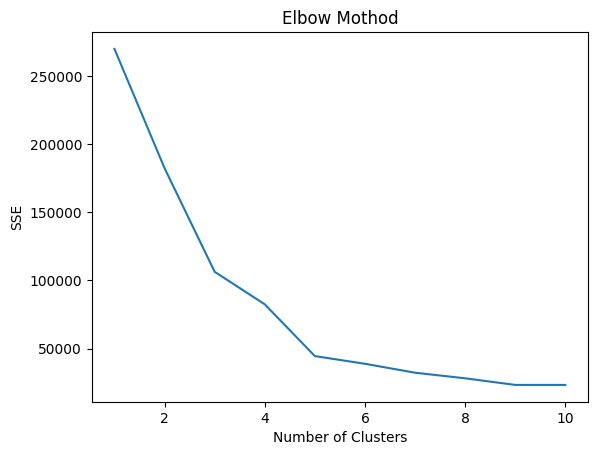

In [48]:
plt.plot(range(1,11),sse)
plt.title("Elbow Mothod")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Optimal number of clusters is 5

# Model Training

In [49]:
x = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [50]:
k_means = KMeans(n_clusters=5,random_state=42)
y_means = k_means.fit_predict(x)
y_means

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

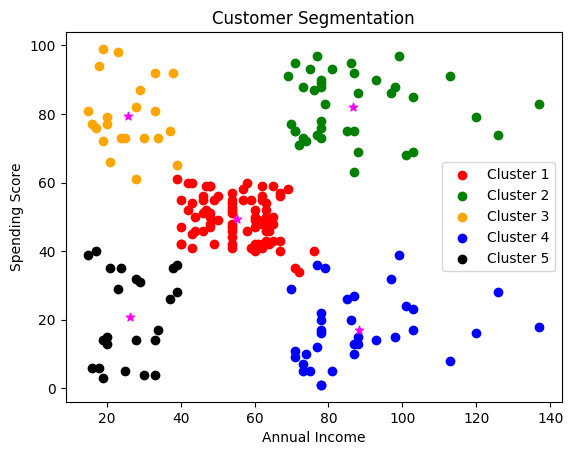

In [51]:
plt.scatter(x.iloc[y_means==0,0],x.iloc[y_means==0,1],c='red',label="Cluster 1")
plt.scatter(x.iloc[y_means==1,0],x.iloc[y_means==1,1],c='green',label="Cluster 2")
plt.scatter(x.iloc[y_means==2,0],x.iloc[y_means==2,1],c='orange',label="Cluster 3")
plt.scatter(x.iloc[y_means==3,0],x.iloc[y_means==3,1],c='blue',label="Cluster 4")
plt.scatter(x.iloc[y_means==4,0],x.iloc[y_means==4,1],c='black',label="Cluster 5")

plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],c="magenta",marker='*')

plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

# Saving the Model

In [52]:
import joblib

In [53]:
joblib.dump(k_means,"customer_segmentation")

['customer_segmentation']

In [54]:
model = joblib.load("customer_segmentation")

In [55]:

model.predict([[80,40]])

C:\Users\Lekha Kasinadhuni\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([3])

In [56]:
from tkinter import *
import joblib

In [57]:
import tkinter as tk
from tkinter import ttk, messagebox
import joblib

def show_entry_fields():
    try:
        p1 = int(e1.get())
        p2 = int(e2.get())

        model = joblib.load('customer_segmentation')
        result = model.predict([[p1, p2]])[0]

        cluster_info = {
            0: "Customers with medium annual income and medium annual spend",
            1: "Customers with high annual income but high annual spend",
            2: "Customers with low annual income and high annual spend",
            3: "Customers with high annual income but low annual spend",
            4: "Customers with low annual income and low annual spend"
        }

        result_label.config(text=f"Segment: {result}\n{cluster_info[result]}", foreground="cyan")

    except ValueError:
        messagebox.showerror("Invalid Input", "Please enter valid numeric values!")

def on_enter(e):
    predict_button.config(foreground="cyan", borderwidth=3, relief="solid")

def on_leave(e):
    predict_button.config(foreground="white", borderwidth=2, relief="ridge")

# Initialize main window
master = tk.Tk()
master.title("Customer Segmentation Using ML")
master.geometry("450x350")
master.configure(bg="black")  # Black background

# Apply custom style for ttk widgets
style = ttk.Style()
style.configure("TLabel", font=("Calibri", 11), foreground="white")
style.configure("TFrame", background="black")
style.configure("TEntry", font=("Calibri", 11))

# Header Label
header_label = ttk.Label(master, text="Customer Segmentation", font=("Calibri", 14, "bold"), foreground="white", background="black")
header_label.pack(pady=10)

# Input Frame (Black Background)
frame = ttk.Frame(master, padding=10)
frame.pack(pady=10)

# Labels without background
tk.Label(frame, text="Annual Income:", fg="white", font=("Calibri", 11), bg="black").grid(row=0, column=0, padx=5, pady=5, sticky="w")
e1 = ttk.Entry(frame, width=20)
e1.grid(row=0, column=1, padx=5, pady=5)

tk.Label(frame, text="Spending Score:", fg="white", font=("Calibri", 11), bg="black").grid(row=1, column=0, padx=5, pady=5, sticky="w")
e2 = ttk.Entry(frame, width=20)
e2.grid(row=1, column=1, padx=5, pady=5)

# Predict Button with neon glow effect
predict_button = tk.Button(master, text="Predict", command=show_entry_fields, 
                           font=("Calibri", 12, "bold"), bg="black", fg="white",
                           activebackground="black", activeforeground="cyan",
                           relief="ridge", borderwidth=2, width=12)

predict_button.pack(pady=15)

# Hover Effects
predict_button.bind("<Enter>", on_enter)
predict_button.bind("<Leave>", on_leave)

# Result Label
result_label = tk.Label(master, text="", font=("Calibri", 11, "bold"), bg="black", fg="white", wraplength=350)
result_label.pack(pady=10)

# Run Application
master.mainloop()